## Bài tập thực hành 1
Thực hiện thống kê mô tả trên tập dữ liệu về phân loại chất lượng rượu đỏ.
Dữ liệu lấy tại https://www.kaggle.com/code/eisgandar/red-wine-quality-eda-classification

## 1. Khai báo thư viện (Load Libraries)

In [9]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns
from IPython import display
import warnings
warnings.filterwarnings("ignore")

## 2. Nạp dữ liệu (Load Dataset)

In [10]:
# Load dataset
df = pd.read_csv("winequality-red.csv")
print("Kích thước dữ liệu:", df.shape)
display.display(df.head())

Kích thước dữ liệu: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 3. Thống kê mô tả (Descriptive Statistics)

#### 3.1. **Hiển thị một số thông tin về dữ liệu**


In [11]:
# shape
print(f'+ Shape: {df.shape}')
# types
print(f'+ Data Types: \n{df.dtypes}')
# head, tail
print(f'+ Contents: ')
display.display(df.head(5))
display.display(df.tail(5))
# info
df.info()

+ Shape: (1599, 12)
+ Data Types: 
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object
+ Contents: 


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#### 3.2. **Kiểm tra missing values & duplicates**
+ Mục tiêu: Đảm bảo dữ liệu đầy đủ, không có ô trống.
+ Mục tiêu: Loại bỏ các dòng trùng hoàn toàn (nếu có).

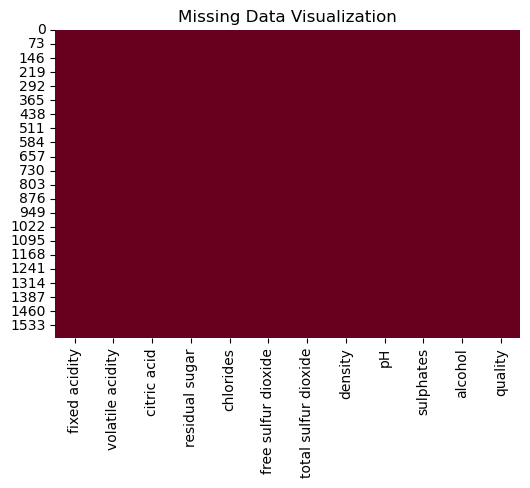

Missing Data Counts:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [12]:
# Kiểm tra giá trị thiếu 
# Tổng số giá trị thiếu từng cột
missing_data = df.isnull().sum()

# Trực quan hóa missing data
plt.figure(figsize=(6, 4))
sns.heatmap(df.isnull(), cmap='RdBu', cbar=False)
plt.title('Missing Data Visualization')
plt.show()

# Hiển thị số lượng dữ liệu bị thiếu
print("Missing Data Counts:\n", missing_data)

In [13]:
# Kiểm tra trùng lặp
# Phát hiện số lượng dòng trùng lặp
duplicates_count = df.duplicated().sum()
print(f"Số lượng dòng trùng lặp phát hiện được: {duplicates_count}")
if duplicates_count > 0:
    display.display(df[df.duplicated()])

# Loại bỏ các dòng trùng lặp
df = df.drop_duplicates()

# Kiểm tra lại sau khi loại bỏ
print(f"Số dòng còn lại sau khi loại bỏ trùng lặp: {df.shape[0]}")

Số lượng dòng trùng lặp phát hiện được: 240


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


Số dòng còn lại sau khi loại bỏ trùng lặp: 1359


#### 3.3. **Mô tả thống kê các biến định lượng**
Mục tiêu: Tính các chỉ số thống kê cơ bản:
+  Mean, Median, Mode, Variance, Std Deviation,
    Range, Q1 (25%), Q2 (50%), Q3 (75%), IQR

In [14]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

desc_stats = pd.DataFrame(index=numeric_cols, columns=[
    'Mean', 'Median', 'Mode', 'Variance', 'Std Deviation',
    'Range', 'Q1 (25%)', 'Q2 (50%)', 'Q3 (75%)', 'IQR'])

for col in numeric_cols:
    desc_stats.loc[col, 'Mean'] = df[col].mean()
    desc_stats.loc[col, 'Median'] = df[col].median()
    desc_stats.loc[col, 'Mode'] = df[col].mode()[0]
    desc_stats.loc[col, 'Variance'] = df[col].var()
    desc_stats.loc[col, 'Std Deviation'] = df[col].std()
    desc_stats.loc[col, 'Range'] = df[col].max() - df[col].min()
    desc_stats.loc[col, 'Q1 (25%)'] = np.percentile(df[col], 25)
    desc_stats.loc[col, 'Q2 (50%)'] = np.percentile(df[col], 50)
    desc_stats.loc[col, 'Q3 (75%)'] = np.percentile(df[col], 75)
    desc_stats.loc[col, 'IQR'] = desc_stats.loc[col, 'Q3 (75%)'] - desc_stats.loc[col, 'Q1 (25%)']

desc_stats = desc_stats.round(3)
desc_stats = desc_stats.reset_index().rename(columns={'index': 'Attribute'})
desc_stats.index = range(1, len(desc_stats) + 1)

from IPython.display import display
display(desc_stats)

,Attribute,Mean,Median,Mode,Variance,Std Deviation,Range,Q1 (25%),Q2 (50%),Q3 (75%),IQR
1,fixed acidity,8.310596,7.9,7.2,3.017134,1.73699,11.3,7.1,7.9,9.2,2.1
2,volatile acidity,0.529478,0.52,0.5,0.0335,0.183031,1.46,0.39,0.52,0.64,0.25
3,citric acid,0.272333,0.26,0.0,0.038235,0.195537,1.0,0.09,0.26,0.43,0.34
4,residual sugar,2.5234,2.2,2.0,1.828752,1.352314,14.6,1.9,2.2,2.6,0.7
5,chlorides,0.088124,0.079,0.08,0.002438,0.049377,0.599,0.07,0.079,0.091,0.021
6,free sulfur dioxide,15.893304,14.0,6.0,109.145456,10.44727,71.0,7.0,14.0,21.0,14.0
7,total sulfur dioxide,46.825975,38.0,28.0,1116.157653,33.408946,283.0,22.0,38.0,63.0,41.0
8,density,0.996709,0.9967,0.9968,0.000003,0.001869,0.01362,0.9956,0.9967,0.99782,0.00222
9,pH,3.309787,3.31,3.3,0.024036,0.155036,1.27,3.21,3.31,3.4,0.19
10,sulphates,0.658705,0.62,0.54,0.029127,0.170667,1.67,0.55,0.62,0.73,0.18


#### 3.4. **Phân tích phân bố của biến phân loại quality**
+ Mục tiêu: Xem dữ liệu có bị mất cân bằng hay không

quality
3     10
4     53
5    577
6    535
7    167
8     17
Name: count, dtype: int64


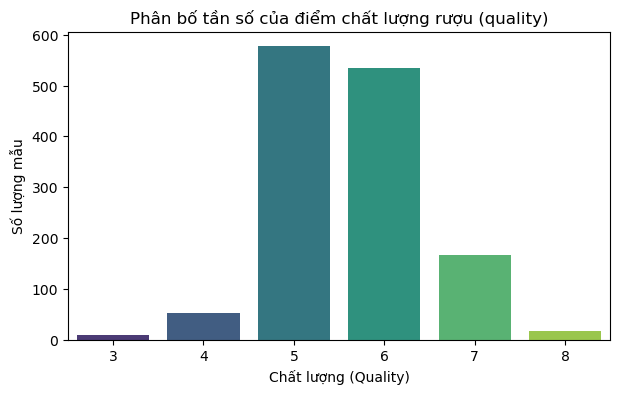

In [15]:
quality_counts = df['quality'].value_counts().sort_index()
print(quality_counts)

plt.figure(figsize=(7,4))
sns.countplot(x='quality', data=df, palette='viridis')
plt.title("Phân bố tần số của điểm chất lượng rượu (quality)")
plt.xlabel("Chất lượng (Quality)")
plt.ylabel("Số lượng mẫu")
plt.show()

#### 3.5. **Kiểm tra phân bố của các biến định lượng**
+ Mục tiêu: Quan sát dạng phân bố (chuẩn, lệch trái, lệch phải).

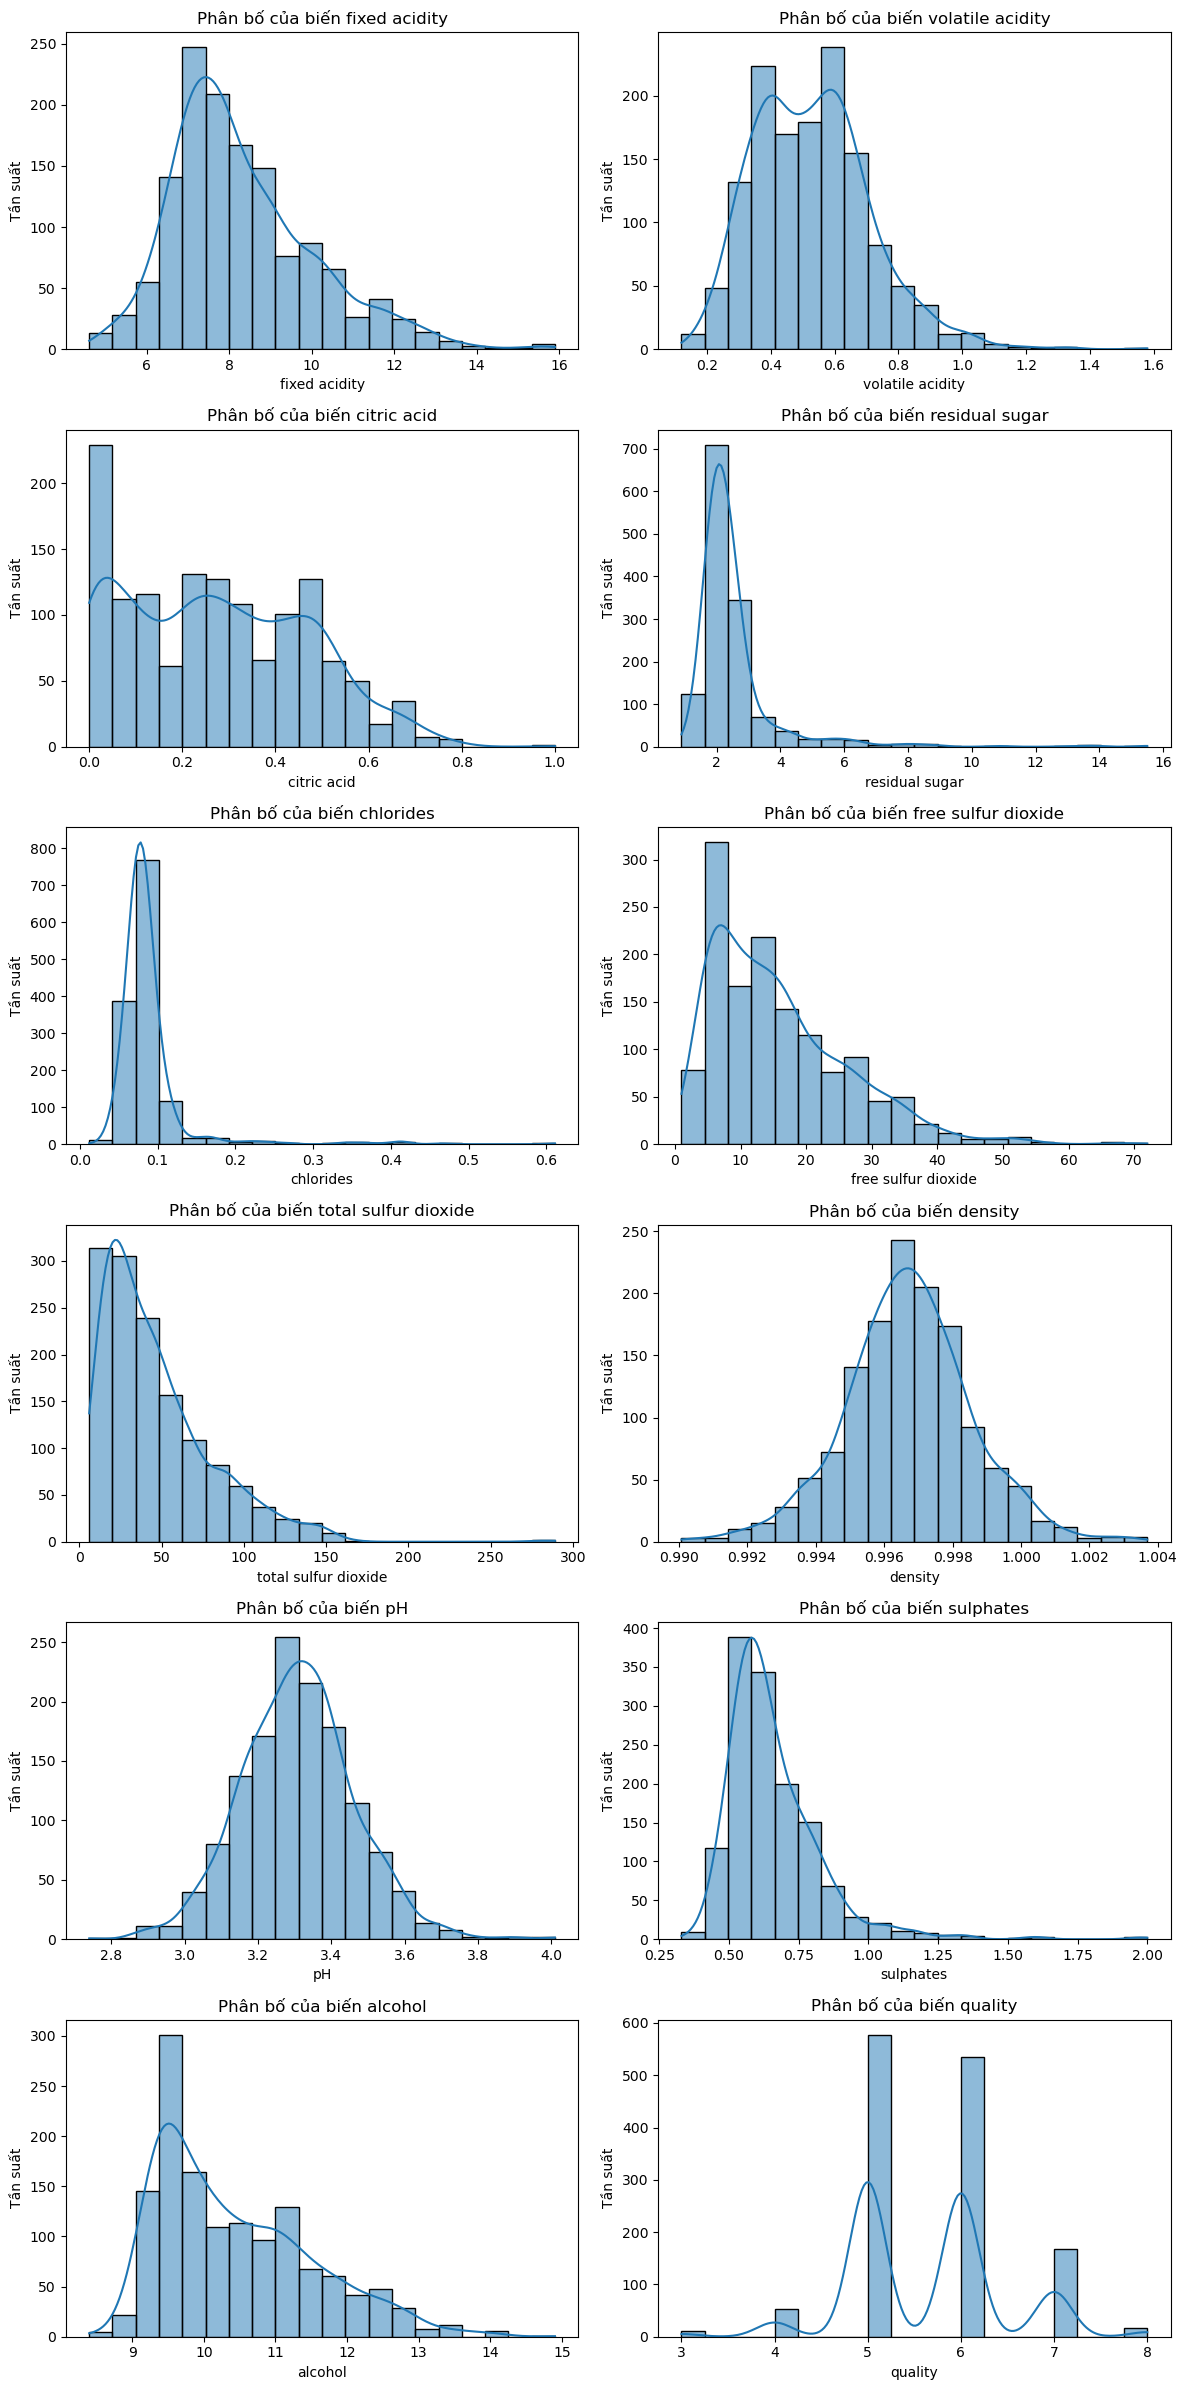

In [16]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

n_cols = 2
n_rows = (len(numeric_cols) + 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f"Phân bố của biến {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Tần suất")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()